In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vintage_data = pd.read_excel('Vintage_data.xlsx')
vintage_data.head()

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Bucket,Delinq_Status
0,100007365142,2000-07-20,8.0,8.0,75000,74693.00,360,1999-12-19,7,2030-01-20,79,62,763,0,0
1,100007365142,2000-08-20,8.0,8.0,75000,74587.91,360,1999-12-19,8,2030-01-20,79,62,763,0,0
2,100007365142,2000-09-20,8.0,8.0,75000,74534.84,360,1999-12-19,9,2030-01-20,79,62,763,0,0
3,100007365142,2000-10-20,8.0,8.0,75000,74481.42,360,1999-12-19,10,2030-01-20,79,62,763,0,0
4,100007365142,2000-11-20,8.0,8.0,75000,74427.64,360,1999-12-19,11,2030-01-20,79,62,763,0,0


In [5]:
vintage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761403 entries, 0 to 761402
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Loan Id           761403 non-null  int64         
 1   Reporting Month   761403 non-null  datetime64[ns]
 2   Original EIR      761403 non-null  float64       
 3   Current EIR       761403 non-null  float64       
 4   Original UPB      761403 non-null  int64         
 5   Current UPB       761403 non-null  float64       
 6   Loan Term         761403 non-null  int64         
 7   Origination date  761403 non-null  datetime64[ns]
 8   Loan Age          761403 non-null  int64         
 9   Maturity Date     761403 non-null  datetime64[ns]
 10  Original LTV      761403 non-null  int64         
 11  DTI               761403 non-null  int64         
 12  FICO Origin       761403 non-null  int64         
 13  Bucket            761403 non-null  int64         
 14  Deli

In [6]:
Vintage_df_new = vintage_data[['Loan Id', 'Loan Age', 'Bucket']]
Vintage_df_new['Delinq_Status'] = np.where(Vintage_df_new['Bucket'] >= 4, 4,Vintage_df_new['Bucket'])
Vintage_df_new.head()

<ipython-input-6-a336066dfdc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vintage_df_new['Delinq_Status'] = np.where(Vintage_df_new['Bucket'] >= 4, 4,Vintage_df_new['Bucket'])


,Loan Id,Loan Age,Bucket,Delinq_Status
0,100007365142,7,0,0
1,100007365142,8,0,0
2,100007365142,9,0,0
3,100007365142,10,0,0
4,100007365142,11,0,0


In [7]:
Vintage_df_new['Bucket'].value_counts()

0     720754
1      24474
2       5334
3       2010
4       1417
       ...  
94         2
95         2
96         2
97         2
98         2
Name: Bucket, Length: 100, dtype: int64

In [8]:
Vintage_df_new['Delinq_Status'].value_counts(sort=False)

0    720754
1     24474
2      5334
3      2010
4      8831
Name: Delinq_Status, dtype: int64

In [9]:
Vintage_df_new.drop(columns=['Bucket'], inplace=True)
Vintage_df_new.sample(5)

<ipython-input-9-879693a89d05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vintage_df_new.drop(columns=['Bucket'], inplace=True)


,Loan Id,Loan Age,Delinq_Status
584990,176505034950,82,0
301353,139112275926,39,0
631364,182167189753,15,0
402707,152738844707,42,1
708664,192126665614,26,0


In [10]:
Vintage_Pivot = Vintage_df_new.pivot(index='Loan Id', 
                                    columns='Loan Age',
                                    values='Delinq_Status')
Vintage_Pivot.reset_index(inplace=True)

In [11]:
pd.set_option('display.max_columns', None)
Vintage_Pivot.head(10)

Loan Age,Loan Id,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276
0,100007365142,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100007386460,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100011322040,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
print(Vintage_Pivot.shape[1])

272


In [13]:
Vintage_30DPD = Vintage_df_new[Vintage_df_new['Delinq_Status'] == 1].groupby('Loan Id')['Loan Age'].first().to_frame()
Vintage_60DPD = Vintage_df_new[Vintage_df_new['Delinq_Status'] == 2].groupby('Loan Id')['Loan Age'].first().to_frame()
Vintage_90DPD = Vintage_df_new[Vintage_df_new['Delinq_Status'] == 3].groupby('Loan Id')['Loan Age'].first().to_frame()   

In [85]:
Vintage_30DPD

,Loan Age
Loan Id,
100023274028,18
100033892603,37
100048724218,11
100057706656,14
100094030068,16
...,...
198866563841,29
198873502392,27
198931251558,9


In [14]:
Vintage_LOAN_ID = Vintage_df_new['Loan Id'].to_frame()
Vintage_LOAN_ID.drop_duplicates(subset='Loan Id', inplace=True)

In [15]:
combine = pd.merge(Vintage_LOAN_ID, Vintage_30DPD, on='Loan Id', how='left')
combine = pd.merge(combine, Vintage_60DPD, on='Loan Id', how='left')
combine = pd.merge(combine, Vintage_90DPD, on='Loan Id', how='left')
combine.head(10)

,Loan Id,Loan Age_x,Loan Age_y,Loan Age
0,100007365142,NaN,NaN,NaN
1,100007386460,NaN,NaN,NaN
2,100011322040,NaN,NaN,NaN
3,100015192562,NaN,NaN,NaN
4,100015874399,NaN,NaN,NaN
5,100017922445,NaN,NaN,NaN
6,100020205696,NaN,NaN,NaN
7,100021703104,NaN,NaN,NaN
8,100023274028,18.0,23.0,30.0
9,100026859568,NaN,NaN,NaN


In [17]:
combine.rename(columns={'Loan Age_x':'30 DPD', 'Loan Age_y':'60 DPD', 'Loan Age':'90 DPD'},inplace=True)

In [18]:
combine['30 DPD'] = combine['30 DPD'].fillna('')
combine['60 DPD'] = combine['60 DPD'].fillna('')
combine['90 DPD'] = combine['90 DPD'].fillna('')
combine

,Loan Id,30 DPD,60 DPD,90 DPD
0,100007365142,,,
1,100007386460,,,
2,100011322040,,,
3,100015192562,,,
4,100015874399,,,
...,...,...,...,...
24634,198971320433,,,
24635,198972751834,,,
24636,198974063165,,,
24637,198985370101,16.0,42.0,


In [90]:
#Columns = [i for i in range(61) if i%3 == 0 and i > 0]
columns=np.arange(1,61)
counts_df = pd.DataFrame(index=['30 DPD','60 DPD','90 DPD'], columns=columns)
counts_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
30 DPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60 DPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90 DPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
for dpd_status in ['30 DPD','60 DPD','90 DPD']:
    for age in columns:
        counts_df.at[dpd_status , age] = combine[combine[dpd_status] == age].shape[0]
        
counts_df  

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
30 DPD,0,0,0,0,0,6,170,252,189,186,198,200,199,152,148,136,132,134,130,123,131,118,110,96,73,78,68,47,52,56,52,50,39,47,44,40,39,35,28,39,33,32,26,16,20,25,16,12,18,17,10,7,12,15,10,9,10,12,8,6
60 DPD,0,0,0,0,0,2,21,31,32,33,49,38,34,28,26,37,33,44,35,26,38,27,33,35,39,14,20,17,24,25,28,15,20,27,26,19,13,16,9,12,15,12,12,14,7,16,17,16,11,5,13,9,10,4,6,6,3,10,7,3
90 DPD,0,0,0,0,0,2,11,16,16,10,9,25,13,15,26,18,19,15,21,18,17,26,15,24,17,22,8,14,7,15,15,20,16,14,19,11,7,12,8,6,8,13,7,12,8,8,8,17,4,8,5,4,6,7,2,6,11,6,7,3


In [92]:
CNT_OBS=combine.shape[0]

In [93]:
columns=np.arange(1,61)
Percent_df = pd.DataFrame(index=['30 DPD','60 DPD','90 DPD'], columns=columns)
Percent_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
30 DPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60 DPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90 DPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
for dpd_status in ['30 DPD','60 DPD','90 DPD']:
    for age in columns:
        Percent_df.at[dpd_status , age] = round((counts_df.at[dpd_status , age] / CNT_OBS)*100,2)
        
Percent_df  

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
30 DPD,0.0,0.0,0.0,0.0,0.0,0.02,0.69,1.02,0.77,0.75,0.8,0.81,0.81,0.62,0.6,0.55,0.54,0.54,0.53,0.5,0.53,0.48,0.45,0.39,0.3,0.32,0.28,0.19,0.21,0.23,0.21,0.2,0.16,0.19,0.18,0.16,0.16,0.14,0.11,0.16,0.13,0.13,0.11,0.06,0.08,0.1,0.06,0.05,0.07,0.07,0.04,0.03,0.05,0.06,0.04,0.04,0.04,0.05,0.03,0.02
60 DPD,0.0,0.0,0.0,0.0,0.0,0.01,0.09,0.13,0.13,0.13,0.2,0.15,0.14,0.11,0.11,0.15,0.13,0.18,0.14,0.11,0.15,0.11,0.13,0.14,0.16,0.06,0.08,0.07,0.1,0.1,0.11,0.06,0.08,0.11,0.11,0.08,0.05,0.06,0.04,0.05,0.06,0.05,0.05,0.06,0.03,0.06,0.07,0.06,0.04,0.02,0.05,0.04,0.04,0.02,0.02,0.02,0.01,0.04,0.03,0.01
90 DPD,0.0,0.0,0.0,0.0,0.0,0.01,0.04,0.06,0.06,0.04,0.04,0.1,0.05,0.06,0.11,0.07,0.08,0.06,0.09,0.07,0.07,0.11,0.06,0.1,0.07,0.09,0.03,0.06,0.03,0.06,0.06,0.08,0.06,0.06,0.08,0.04,0.03,0.05,0.03,0.02,0.03,0.05,0.03,0.05,0.03,0.03,0.03,0.07,0.02,0.03,0.02,0.02,0.02,0.03,0.01,0.02,0.04,0.02,0.03,0.01


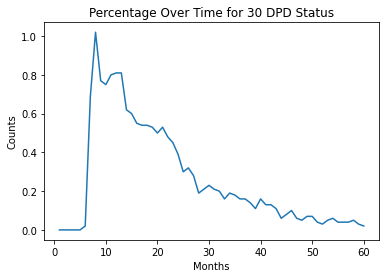

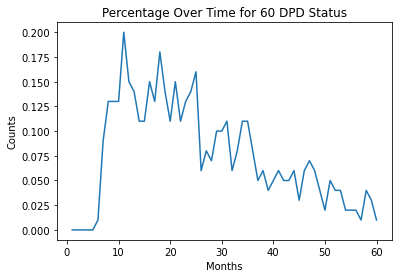

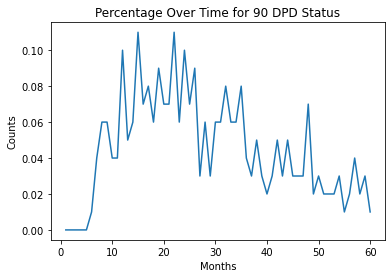

In [95]:
for dpd_status in ['30 DPD','60 DPD','90 DPD']: 

    # Plotting line charts
    fig, ax = plt.subplots()

    ax.plot(Percent_df.columns, Percent_df.loc[dpd_status], label=dpd_status)

    # Set labels and title
    ax.set_xlabel('Months')
    ax.set_ylabel('Counts')
    ax.set_title(f'Percentage Over Time for {dpd_status} Status')
    